In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/content/sample_data/train.csv')

In [26]:
new_df = df.sample(30000,random_state=2)

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [28]:
new_df.shape

(30000, 6)

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 398782 to 312470
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [30]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [31]:
new_df.duplicated().sum()

0

In [32]:
print(new_df['is_duplicate'].value_counts())

is_duplicate
0    19013
1    10987
Name: count, dtype: int64


In [33]:
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)

is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

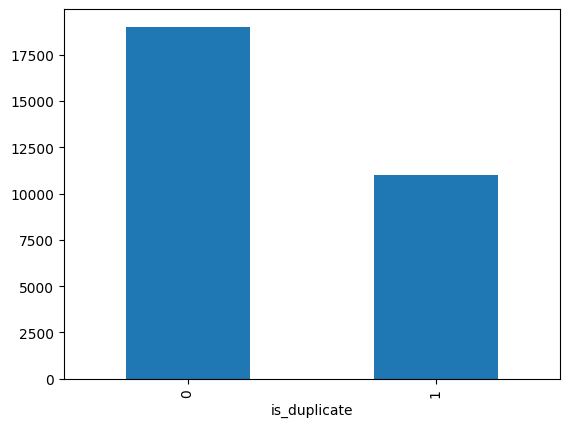

In [34]:
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [37]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions: ', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions that appear more than once: ', x[x].shape[0])



Number of unique questions:  55299
Number of questions that appear more than once:  3480


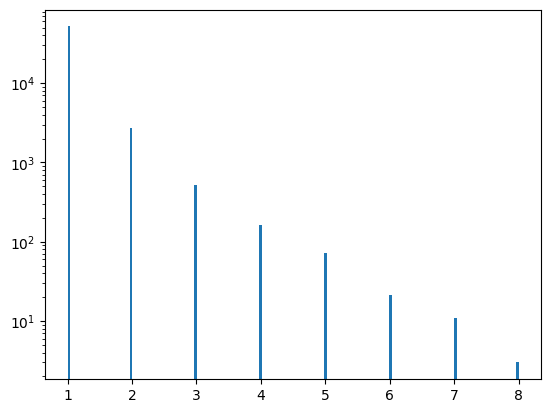

In [38]:
#repeated question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [48]:
# prompt: feature engineering

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [41]:
# Function to clean and preprocess text
def preprocess_text(text):

  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return ' '.join(tokens)

In [49]:
# Apply preprocessing to question columns
new_df['question1'] = new_df['question1'].fillna('').apply(preprocess_text)
new_df['question2'] = new_df['question2'].fillna('').apply(preprocess_text)

In [50]:
# Feature engineering:
# 1. Length of questions
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [51]:
# 2. Difference in length
new_df['len_diff'] = abs(new_df['q1_len'] - new_df['q2_len'])

In [55]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,len_diff,common_words,word_ratio,q1_num_words,q2_num_words
398782,398782,496695,532029,best marketing automation tool small midsize c...,best marketing automation tool small midsized ...,1,52,53,1,6,0.428571,7,7
115086,115086,187729,187730,poor want invest,quite poor want rich,0,16,20,4,2,0.285714,3,4
327711,327711,454161,454162,india live abroad met guy france partyi want date,tiet thapar university thapar university insti...,0,49,93,44,0,0.000000,9,11
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0,33,81,48,0,0.000000,6,12
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,30,32,2,3,0.333333,4,5


In [52]:
# 3. Number of common words
def common_words(row):
  """Calculates the number of common words between two questions."""
  q1_words = set(row['question1'].split())
  q2_words = set(row['question2'].split())
  return len(q1_words.intersection(q2_words))

new_df['common_words'] = new_df.apply(common_words, axis=1)

In [56]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [57]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,len_diff,common_words,word_ratio,q1_num_words,q2_num_words,word_total
398782,398782,496695,532029,best marketing automation tool small midsize c...,best marketing automation tool small midsized ...,1,52,53,1,6,0.428571,7,7,14
115086,115086,187729,187730,poor want invest,quite poor want rich,0,16,20,4,2,0.285714,3,4,7
327711,327711,454161,454162,india live abroad met guy france partyi want date,tiet thapar university thapar university insti...,0,49,93,44,0,0.000000,9,11,18
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0,33,81,48,0,0.000000,6,12,18
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,30,32,2,3,0.333333,4,5,9


In [53]:
# 4.  Ratio of common words to total words
def word_ratio(row):
  """Calculates the ratio of common words to total words."""
  q1_words = set(row['question1'].split())
  q2_words = set(row['question2'].split())
  total_words = len(q1_words) + len(q2_words)
  common_words = len(q1_words.intersection(q2_words))
  if total_words == 0:
    return 0
  return common_words / total_words

new_df['word_ratio'] = new_df.apply(word_ratio, axis=1)

In [54]:
# Display the dataframe with new features
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,len_diff,common_words,word_ratio
398782,398782,496695,532029,best marketing automation tool small midsize c...,best marketing automation tool small midsized ...,1,52,53,1,6,0.428571
115086,115086,187729,187730,poor want invest,quite poor want rich,0,16,20,4,2,0.285714
327711,327711,454161,454162,india live abroad met guy france partyi want date,tiet thapar university thapar university insti...,0,49,93,44,0,0.000000
367788,367788,498109,491396,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...,0,33,81,48,0,0.000000
151235,151235,237843,50930,consequence bhopal gas tragedy,reason behind bhopal gas tragedy,0,30,32,2,3,0.333333


minimum characters 0
maximum characters 236
average num of characters 36


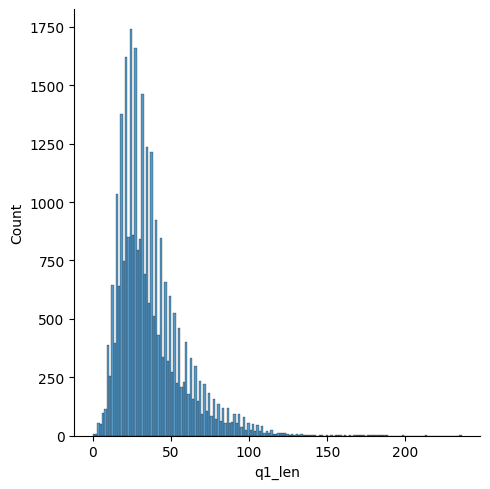

In [58]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 0
maximum characters 638
average num of characters 36


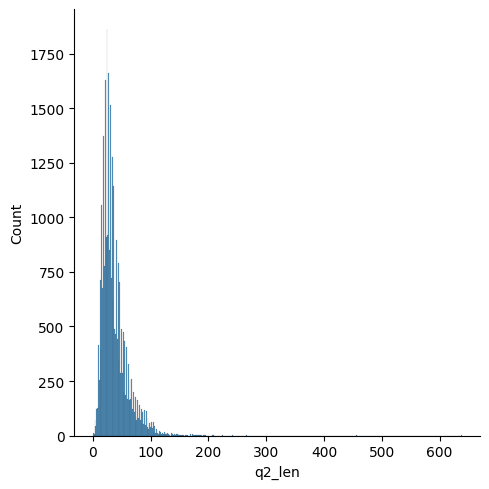

In [61]:
# Analysis of features
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 108
average num of words 5


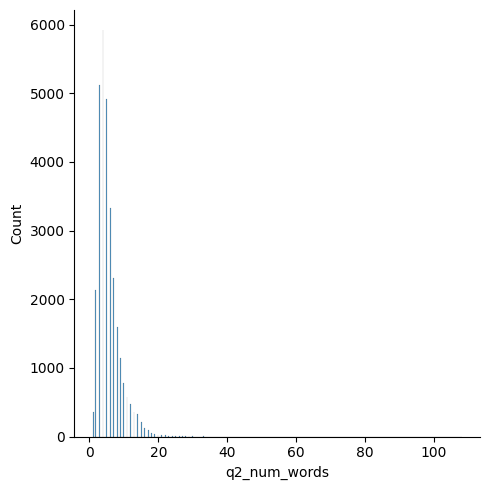

In [63]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

<ipython-input-65-6444483bb0ee>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
<ipython-input-65-6444483bb0ee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='

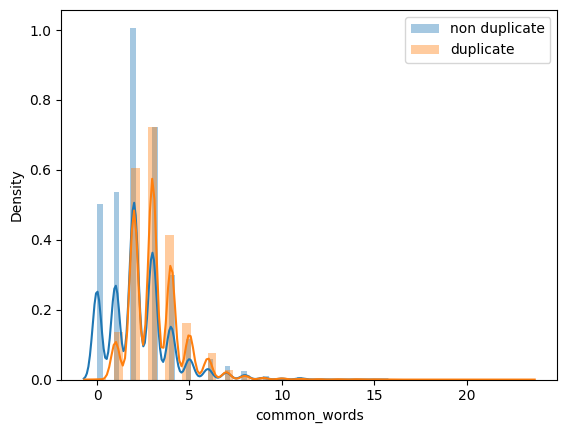

In [65]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

<ipython-input-68-71153027f375>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_ratio'],label='non duplicate')
<ipython-input-68-71153027f375>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_ratio'],label='dupl

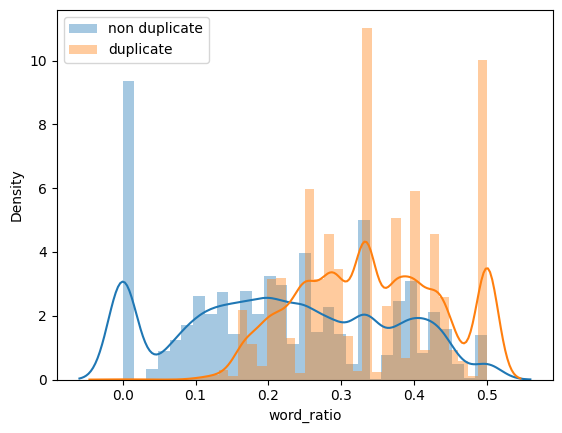

In [68]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_ratio'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_ratio'],label='duplicate')
plt.legend()
plt.show()

In [70]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,best marketing automation tool small midsize c...,best marketing automation tool small midsized ...
115086,poor want invest,quite poor want rich
327711,india live abroad met guy france partyi want date,tiet thapar university thapar university insti...
367788,many people u hate southern state,boyfriend doesnt feel guilty hurt cried tellin...
151235,consequence bhopal gas tragedy,reason behind bhopal gas tragedy


In [71]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 9)


,is_duplicate,q1_len,q2_len,len_diff,common_words,word_ratio,q1_num_words,q2_num_words,word_total
398782,1,52,53,1,6,0.428571,7,7,14
115086,0,16,20,4,2,0.285714,3,4,7
327711,0,49,93,44,0,0.000000,9,11,18
367788,0,33,81,48,0,0.000000,6,12,18
151235,0,30,32,2,3,0.333333,4,5,9


In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
cv = CountVectorizer(max_features=3000)
questions = list(ques_df['question1']) + list(ques_df['question2'])
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [74]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [75]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6009)


,is_duplicate,q1_len,q2_len,len_diff,common_words,word_ratio,q1_num_words,q2_num_words,word_total,0,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,52,53,1,6,0.428571,7,7,14,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,16,20,4,2,0.285714,3,4,7,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,49,93,44,0,0.000000,9,11,18,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,33,81,48,0,0.000000,6,12,18,0,...,1,0,0,0,0,0,0,0,0,0
151235,0,30,32,2,3,0.333333,4,5,9,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7686666666666667

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.764